In [6]:
!pip install tensorflow_datasets
!pip install seaborn
!pip3 install scikit-learn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [7]:

import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import tensorflow_datasets as tfds #instalar usando pip install tensorflow_datasets
import matplotlib.pyplot as plt
import seaborn as sns
from keras import callbacks
from sklearn.metrics import accuracy_score
from os import listdir
from os.path import isfile, join

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
BATCH_SIZE =256
IMG_SIZE = (256, 256)
PATH = 'dataset/' # ruta del dataset

EPOCS = 10

In [10]:
# train dataset
train_dir = os.path.join(PATH, 'train')
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,batch_size=BATCH_SIZE, image_size=IMG_SIZE, shuffle=True)

Found 8338 files belonging to 6 classes.


In [11]:
# validation dataset
validation_dir = os.path.join(PATH, 'valid')
validation_ds = tf.keras.utils.image_dataset_from_directory(validation_dir, batch_size=BATCH_SIZE, image_size=IMG_SIZE, shuffle=True) 

Found 1791 files belonging to 6 classes.


In [12]:
# test dataset
test_dir = os.path.join(PATH, 'test')
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=BATCH_SIZE, image_size=IMG_SIZE, shuffle=False) 

Found 1787 files belonging to 6 classes.


In [13]:
# class names
class_names = train_ds.class_names
print(class_names)

['cars', 'cats', 'dogs', 'humans', 'monkeys', 'motorbikes']


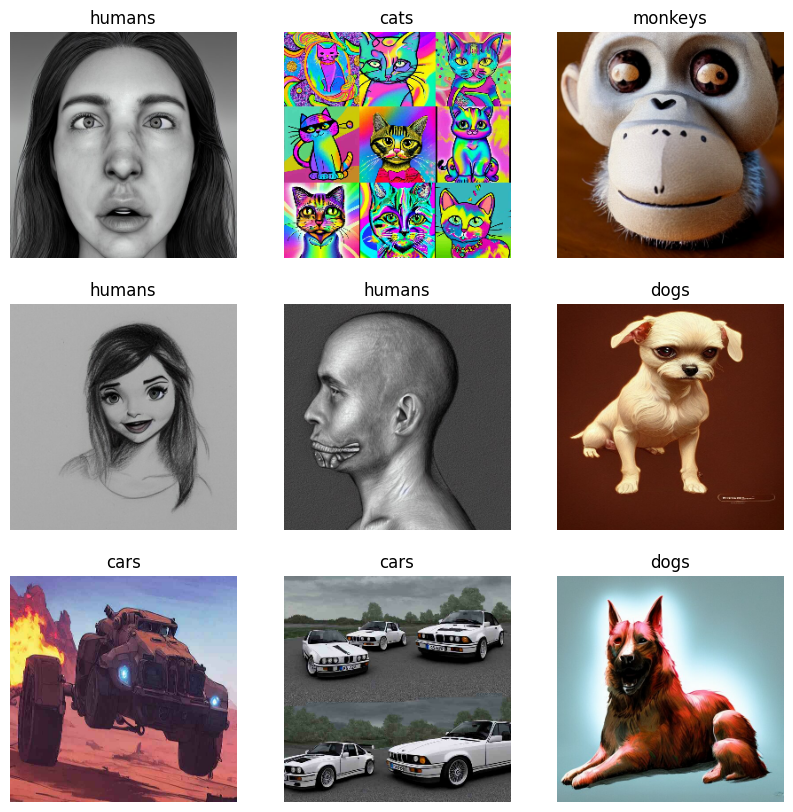

In [14]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [15]:
!pip install keras_preprocessing
!pip install opencv-python
!export DEBIAN_FRONTEND=noninteractive
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y --fix-missing

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 336 kB in 2s (199 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.3-1).
libxext6 is alr

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os

# Preparación del dataset

In [17]:
train_datagen = ImageDataGenerator( horizontal_flip=True, shear_range=0.2, rescale= 1./255, zoom_range=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_path='dataset/train'
test_path = 'dataset/test'
val_path = 'dataset/valid'

In [18]:
classes = class_names

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    shuffle = False,
    seed = 42,
    class_mode = "categorical",
    classes = classes)
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    seed = 42,
    shuffle = False,
    batch_size=32,
    class_mode = "categorical",
    classes = classes)
val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(224,224),
    seed = 42,
    shuffle = False,
    batch_size=32,
    class_mode = "categorical",
    classes = classes)

Found 8338 images belonging to 6 classes.
Found 1787 images belonging to 6 classes.
Found 1791 images belonging to 6 classes.


In [19]:
import glob
def plot_confusion_matrix(y_true, y_pred, clases,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    clases = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=clases, yticklabels=clases,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

def getClass(clases, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['train', 'test']
    if not k_fold:
        path = "dataset/" + data_type + "/"
        #esto lo puede editar
        for i,f in enumerate(clases):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type.upper(), "images of " , clases[i].upper())
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "img_dataset/" + v + "/"
            #esto lo puede editar
            for i,f in enumerate(clases):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels


In [20]:
from sklearn.preprocessing import StandardScaler
import glob

dim = 224
#Choose your Fruits
fruits = class_names
#Get Images and Labels
X_t, y_train = getClass(fruits, 'train', print_n=True,k_fold=False)
X_test, y_test = getClass(fruits, 'test', print_n=True,k_fold=False)
X_val, y_val = getClass(fruits, 'valid', print_n=True,k_fold=False)

There are  1390   TRAIN images of  CARS
There are  1370   TRAIN images of  CATS
There are  1422   TRAIN images of  DOGS
There are  1409   TRAIN images of  HUMANS
There are  1382   TRAIN images of  MONKEYS
There are  1365   TRAIN images of  MOTORBIKES
There are  298   TEST images of  CARS
There are  294   TEST images of  CATS
There are  305   TEST images of  DOGS
There are  302   TEST images of  HUMANS
There are  296   TEST images of  MONKEYS
There are  292   TEST images of  MOTORBIKES
There are  299   VALID images of  CARS
There are  294   VALID images of  CATS
There are  305   VALID images of  DOGS
There are  303   VALID images of  HUMANS
There are  297   VALID images of  MONKEYS
There are  293   VALID images of  MOTORBIKES


In [21]:
def get_features(X_t):
    X_train = []
    for i in range(X_t.shape[0]):
        #obtener ppos 1, 2, 3
        x_aux = X_t[i][1:]
        x_aux = np.array(x_aux.flatten())
        X_train.append(x_aux)
    X_train = np.array(X_train)
    return X_train

X_train = get_features(X_t)
X_train.shape


(8338, 149856)

In [22]:
import random

X__train = X_train
y__train = y_train
#ordenar X__train y y__train de manera aleatoria
new_x_train = []
new_y_train = []
rx = []

for i in range(len(X__train)):
    r = random.randint(0, len(X__train)-1)
    while r in rx:
        r = random.randint(0, len(X__train)-1)
    rx.append(r)
    new_x_train.append(X__train[r])
    new_y_train.append(y__train[r])

X__train = new_x_train
y__train = new_y_train

#get test features
X__test = get_features(X_test)
X__val = get_features(X_val)



In [23]:
len(y__train)

8338

In [27]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split


dim = 224
print(dim)


svm_model = svm.SVC(kernel='linear', C=1, gamma=1)

epochs = 10
batch_size = BATCH_SIZE



#entrenar el modelo usando batchsize y epochs verbose
for i in range(epochs):
    
    for j in range(0, len(X__train), batch_size):
        print("Batch: ", j, "/", len(X__train), " Epoch: ", i+1)
        svm_model.fit(X__train[j:j+batch_size], y__train[j:j+batch_size])


#evaluate model train
y_pred = svm_model.predict(X__train)
print("Accuracy: (train)", metrics.accuracy_score(y__train, y_pred))
    
#evaluate model
y_pred = svm_model.predict(X__val)
print("Accuracy: (val)", metrics.accuracy_score(y_val, y_pred))


y_pred = svm_model.predict(X__test)
print("Accuracy (test): ", metrics.accuracy_score(y_test, y_pred))



224
Batch:  0 / 8338  Epoch:  1
Batch:  256 / 8338  Epoch:  1
Batch:  512 / 8338  Epoch:  1
Batch:  768 / 8338  Epoch:  1
Batch:  1024 / 8338  Epoch:  1
Batch:  1280 / 8338  Epoch:  1
Batch:  1536 / 8338  Epoch:  1
Batch:  1792 / 8338  Epoch:  1
Batch:  2048 / 8338  Epoch:  1
Batch:  2304 / 8338  Epoch:  1
Batch:  2560 / 8338  Epoch:  1
Batch:  2816 / 8338  Epoch:  1
Batch:  3072 / 8338  Epoch:  1
Batch:  3328 / 8338  Epoch:  1
Batch:  3584 / 8338  Epoch:  1
Batch:  3840 / 8338  Epoch:  1
Batch:  4096 / 8338  Epoch:  1
Batch:  4352 / 8338  Epoch:  1
Batch:  4608 / 8338  Epoch:  1
Batch:  4864 / 8338  Epoch:  1
Batch:  5120 / 8338  Epoch:  1
Batch:  5376 / 8338  Epoch:  1
Batch:  5632 / 8338  Epoch:  1
Batch:  5888 / 8338  Epoch:  1
Batch:  6144 / 8338  Epoch:  1
Batch:  6400 / 8338  Epoch:  1
Batch:  6656 / 8338  Epoch:  1
Batch:  6912 / 8338  Epoch:  1
Batch:  7168 / 8338  Epoch:  1
Batch:  7424 / 8338  Epoch:  1
Batch:  7680 / 8338  Epoch:  1
Batch:  7936 / 8338  Epoch:  1
Batch:  81

Batch:  512 / 8338  Epoch:  9
Batch:  768 / 8338  Epoch:  9
Batch:  1024 / 8338  Epoch:  9
Batch:  1280 / 8338  Epoch:  9
Batch:  1536 / 8338  Epoch:  9
Batch:  1792 / 8338  Epoch:  9
Batch:  2048 / 8338  Epoch:  9
Batch:  2304 / 8338  Epoch:  9
Batch:  2560 / 8338  Epoch:  9
Batch:  2816 / 8338  Epoch:  9
Batch:  3072 / 8338  Epoch:  9
Batch:  3328 / 8338  Epoch:  9
Batch:  3584 / 8338  Epoch:  9
Batch:  3840 / 8338  Epoch:  9
Batch:  4096 / 8338  Epoch:  9
Batch:  4352 / 8338  Epoch:  9
Batch:  4608 / 8338  Epoch:  9
Batch:  4864 / 8338  Epoch:  9
Batch:  5120 / 8338  Epoch:  9
Batch:  5376 / 8338  Epoch:  9
Batch:  5632 / 8338  Epoch:  9
Batch:  5888 / 8338  Epoch:  9
Batch:  6144 / 8338  Epoch:  9
Batch:  6400 / 8338  Epoch:  9
Batch:  6656 / 8338  Epoch:  9
Batch:  6912 / 8338  Epoch:  9
Batch:  7168 / 8338  Epoch:  9
Batch:  7424 / 8338  Epoch:  9
Batch:  7680 / 8338  Epoch:  9
Batch:  7936 / 8338  Epoch:  9
Batch:  8192 / 8338  Epoch:  9
Batch:  0 / 8338  Epoch:  10
Batch:  256 

In [51]:

plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
    fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)
plt.show()

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} Shapes of all inputs must match: values[0].shape = [1787] != values[1].shape = [1791] [Op:Pack] name: stack

In [48]:
from sklearn.utils.multiclass import unique_labels

#confusion matrix
cm, ax = plot_confusion_matrix(y_test, y_pred, clases=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

#accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1787, 1791]

In [49]:
#print loss data
plt.plot(svm_history.history['loss'])
plt.plot(svm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'svm_history' is not defined

In [50]:
#print accuracy data
plt.plot(svm_history.history['accuracy'])
plt.plot(svm_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'svm_history' is not defined